# Sentiment Analysis for Movie Reviews

## Overview
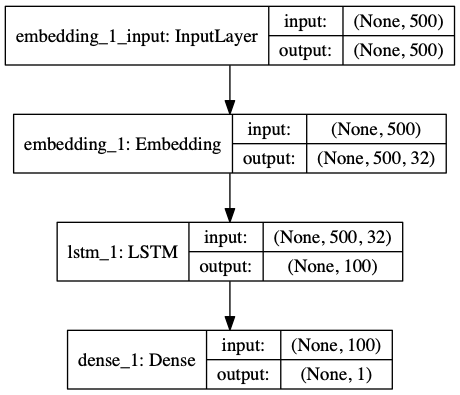



## What we will accomplish in this example:

- Create an LSTM model for sentiment analysis based on the content of each rewiew.
- Use Keras to train the model for text classification by having it "read" at thousands of examples 
- Check the model's accuracy 

### Dataset

The dataset contains 50000 movies reviews from the Internet Movie Database, split into 25000 reviews for training and 25000 reviews for testing. Half of the reviews are positive (1) and half are negative (0).

The dataset has already been preprocessed, and each word has been replaced by an integer index. The reviews are thus represented as varying-length sequences of integers. (Word indices begin at "3", as "1" is used to mark the start of a review and "2" represents all out-of-vocabulary words. "0" will be used later to pad shorter reviews to a fixed size.)

In [1]:
import numpy

from keras.datasets import imdb
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


### Loading the dataset

In [2]:
top_words = 5000 # vocab
# Here each word is replaced by its index number (list)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(y_train)


17473536/17464789 [==============================] - 1s 0us/step
[1 0 0 ... 0 1 0]


### Model Architecture

In [12]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print(X_train)
# create the model
embedding_vector_length = 32
lstm_nodes = 100

model = Sequential()
# Embeding turns positive integers (indexes) into dense vectors of fixed size
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(lstm_nodes))
model.add(Dense(1, activation='sigmoid'))
print model.summary()


[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


### Training

In [4]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=64)

/usr/local/lib/python2.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 219s 10ms/step - loss: 0.4848 - accuracy: 0.7765 - val_loss: 0.3868 - val_accuracy: 0.8496
Epoch 2/5
22500/22500 [==============================] - 223s 10ms/step - loss: 0.3215 - accuracy: 0.8713 - val_loss: 0.3703 - val_accuracy: 0.8392
Epoch 3/5
22500/22500 [==============================] - 222s 10ms/step - loss: 0.2701 - accuracy: 0.8950 - val_loss: 0.3032 - val_accuracy: 0.8844
Epoch 4/5
22500/22500 [==============================] - 219s 10ms/step - loss: 0.2521 - accuracy: 0.9047 - val_loss: 0.3254 - val_accuracy: 0.8800
Epoch 5/5
22500/22500 [==============================] - 220s 10ms/step - loss: 0.2300 - accuracy: 0.9126 - val_loss: 0.3188 - val_accuracy: 0.8768


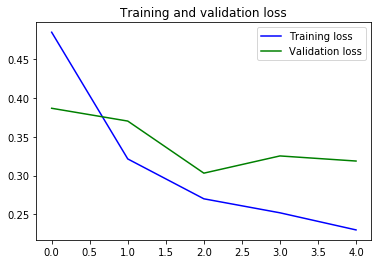

In [5]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model Accuracy

In [6]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.3341655639743805, 0.8633999824523926]

### Example Prediction

In [7]:
example = 16000
print "test set:", X_test.shape
a = X_test[example,:]
print "data point to evaluate", a.shape
data_input = numpy.array([a])
print "as a vector",data_input.shape

test set: (25000, 500)
data point to evaluate (500,)
as a vector (1, 500)


In [8]:
c = model.predict_classes(data_input)
print "predicted class: ", c[0] 
prob = model.predict_proba(data_input)
print "probability: ", prob[0]

predicted class:  [0]
probability:  [0.35312936]


In [9]:
print "ground truth:", y_test[example]

ground truth: 0


In [10]:
#looking back at the text https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification
INDEX_FROM = 3
word_to_id = imdb.get_word_index()
word_to_id = {k:(v + INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key, value in word_to_id.items()}

1654784/1641221 [==============================] - 0s 0us/step


In [11]:
print(' '.join(id_to_word[id] for id in X_test[example]))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [11]:
model.save_weights('i')